In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

import tensorflow as tf
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.layers import Dense,Input,Dropout, GlobalAveragePooling2D,Flatten,Conv2D, BatchNormalization,Activation,MaxPooling2D
from keras.models import load_model,Model,Sequential
from keras.optimizers import Adam,SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
!pip install kaggle

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d ananthu017/emotion-detection-fer

 87% 57.0M/65.2M [00:00<00:00, 89.6MB/s]
100% 65.2M/65.2M [00:00<00:00, 87.4MB/s]


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [5]:
!unzip emotion-detection-fer

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/im37.png      
  inflating: train/sad/im370.png     
  inflating: train/sad/im3700.png    
  inflating: train/sad/im3701.png    
  inflating: train/sad/im3702.png    
  inflating: train/sad/im3703.png    
  inflating: train/sad/im3704.png    
  inflating: train/sad/im3705.png    
  inflating: train/sad/im3706.png    
  inflating: train/sad/im3707.png    
  inflating: train/sad/im3708.png    
  inflating: train/sad/im3709.png    
  inflating: train/sad/im371.png     
  inflating: train/sad/im3710.png    
  inflating: train/sad/im3711.png    
  inflating: train/sad/im3712.png    
  inflating: train/sad/im3713.png    
  inflating: train/sad/im3714.png    
  inflating: train/sad/im3715.png    
  inflating: train/sad/im3716.png    
  inflating: train/sad/im3717.png    
  inflating: train/sad/im3718.png    
  inflating: train/sad/im3719.png    
  inflating: train/sad/im372.png     
  inflating: train/sad/im3720.png    

In [6]:
train_dir = "/content/train"
test_dir = "/content/test"

In [9]:
img_size=48

In [7]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [10]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [13]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [14]:
epochs = 50
batch_size = 64

In [15]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/50
359/359 [==============================] - 40s 81ms/step - loss: 2.0890 - accuracy: 0.2229 - val_loss: 1.9587 - val_accuracy: 0.1536
Epoch 2/50
359/359 [==============================] - 25s 70ms/step - loss: 1.7752 - accuracy: 0.3030 - val_loss: 1.8491 - val_accuracy: 0.2661
Epoch 3/50
359/359 [==============================] - 23s 65ms/step - loss: 1.5514 - accuracy: 0.3979 - val_loss: 1.3984 - val_accuracy: 0.4700
Epoch 4/50
359/359 [==============================] - 24s 67ms/step - loss: 1.3589 - accuracy: 0.4795 - val_loss: 1.3528 - val_accuracy: 0.5091
Epoch 5/50
359/359 [==============================] - 23s 65ms/step - loss: 1.2669 - accuracy: 0.5173 - val_loss: 1.2011 - val_accuracy: 0.5398
Epoch 6/50
359/359 [==============================] - 23s 65ms/step - loss: 1.2105 - accuracy: 0.5348 - val_loss: 1.2464 - val_accuracy: 0.5384
Epoch 7/50
359/359 [==============================] - 25s 68ms/step - loss: 1.1743 - accuracy: 0.5539 - val_loss: 1.1857 - val_accuracy:

In [16]:
model.save_weights('model_weights_FER.h5')

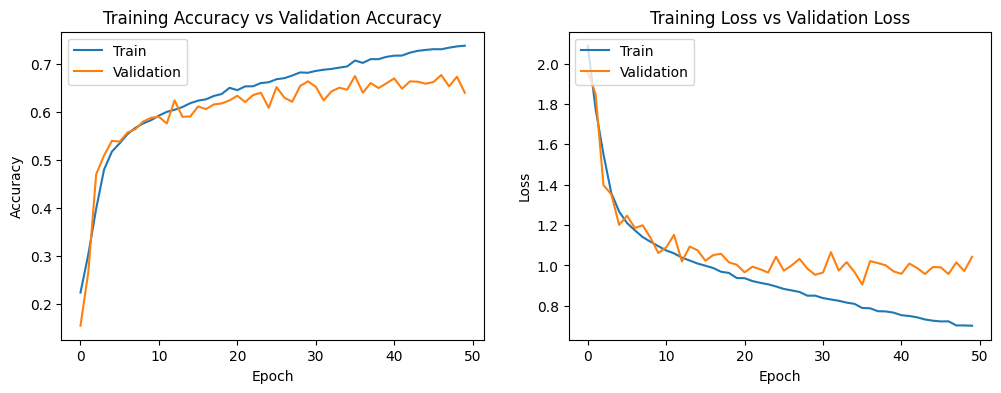

In [17]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the validation set
predictions = model.predict(validation_generator)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = validation_generator.classes

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Print classification report
class_labels = list(validation_generator.class_indices.keys())
class_report = classification_report(true_labels, predicted_classes, target_names=class_labels)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


23/23 [==============================] - 1s 43ms/step
Confusion Matrix:
[[35  4 18 46 43 22 23]
 [ 5  0  2  0  7  3  5]
 [40  4 21 45 41 25 28]
 [67  5 30 89 69 54 40]
 [38  1 27 58 59 33 30]
 [48  1 25 65 59 34 17]
 [31  0 16 29 41 23 26]]

Classification Report:
              precision    recall  f1-score   support

       angry       0.13      0.18      0.15       191
   disgusted       0.00      0.00      0.00        22
     fearful       0.15      0.10      0.12       204
       happy       0.27      0.25      0.26       354
     neutral       0.18      0.24      0.21       246
         sad       0.18      0.14      0.15       249
   surprised       0.15      0.16      0.16       166

    accuracy                           0.18      1432
   macro avg       0.15      0.15      0.15      1432
weighted avg       0.19      0.18      0.18      1432



23/23 [==============================] - 0s 20ms/step


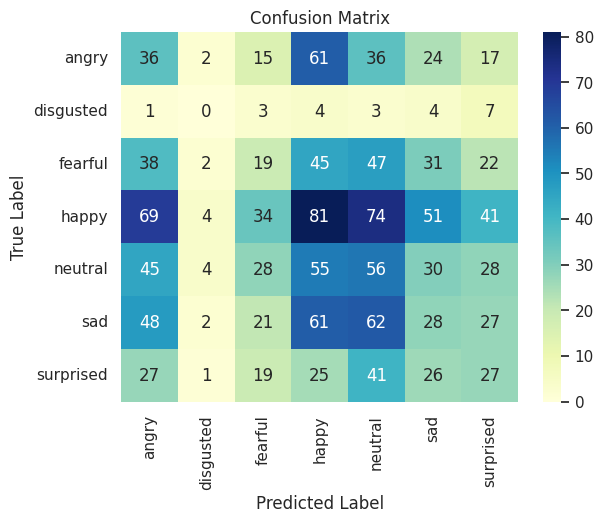

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()